# Validating: Random Forests

||continuous|categorical|
|---|---|---|
|**supervised**|**regression**|**classification**|
|unsupervised|dimension reduction|clustering|

In the previous notebook we saw, Random Forest at work. In this one we are taking a look at how well its working....

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# import warnings
# warnings.filterwarnings('ignore')

### Precision versus Recall

* **Precision** (also called positive predictive value) is the fraction of relevant instances among the retrieved instances
* **Recall** (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. 



Both precision and recall are therefore based on an understanding and measure of relevance.

***For Example*** : 
- Suppose a computer program for recognizing dogs in photographs identifies eight dogs in a picture containing 12 dogs and some cats. 
    - Of the eight dogs identified, five actually are dogs (true positives), while the rest are cats (false positives). 
    - The program's precision is 5/8 while its recall is 5/12. 
    
    
    
    
- When a search engine returns 30 pages, only 20 of which were relevant while failing to return 40 additional relevant pages. 
    - its precision is 20/30 = 2/3 while its recall is 20/60 = 1/3. 
    - So, in this case, precision is "how useful the search results are", and recall is "how complete the results are".



<div id="container"> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png" class="center" alt="Random Forest" style="width: 300px;"/> 



In statistics, if the null hypothesis is that - ***all items are irrelevant***
- where the hypothesis is accepted or rejected based on the number selected compared with the sample size 
- absence of type I and type II errors corresponds respectively to maximum precision (no false positive) and maximum recall (no false negative). 
- The above pattern recognition example
    - 8 dogs in a picture containing 12 dogs and some cats, 
        - 5 actually are dogs (true positives), while the rest are cats (false positives)
    - contained 8 − 5 = 3 **Type I errors**, and 12 − 5 = 7 **Type II errors.** 
    
    
- **Precision** can be seen as a measure of ***exactness or quality***, whereas **Recall** is a measure of ***completeness or quantity.*** 

In simple terms, high precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results. [Source](https://en.wikipedia.org/wiki/Precision_and_recall)



**$F1\_Score$** (also F-score or F-measure) is a measure of a test's accuracy

$$F1\_Score = 2*\frac{precison * recall}{precision + recall}$$

### Another Example: Lets complicate the model a little more

Reload Digits dataset

In [26]:
# Learn to predict each class against the other
from sklearn import svm
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

Binarize the labels and use SVM

In [27]:
# Binarize the output
y = label_binarize(y, classes=range(0,10))
n_classes = y.shape[1]

Do a train-test split and train the classifier -  Here we are trying to compare the predictive power of each class to other classes so [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier) 

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7,
                                                    random_state=0)

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
fit_model = classifier.fit(X_train, y_train)
y_score = fit_model.decision_function(X_test)
y_pred_svm = fit_model.predict(X_test)

**Accuracy report**

In [37]:
from sklearn.metrics import classification_report
print (classification_report(y_pred_svm, y_test) )

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       122
           1       0.53      0.96      0.68        69
           2       0.72      0.99      0.84        88
           3       0.61      1.00      0.76        79
           4       0.86      1.00      0.92       103
           5       0.54      1.00      0.70        76
           6       0.88      1.00      0.94       112
           7       0.85      0.97      0.91       102
           8       0.05      1.00      0.09         6
           9       0.42      1.00      0.59        52

   micro avg       0.64      0.99      0.78       809
   macro avg       0.64      0.99      0.74       809
weighted avg       0.74      0.99      0.84       809
 samples avg       0.64      0.64      0.64       809



/Users/tutu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Reciever Operating Characteristic: 

A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting


- The fraction of true positives out of the positives - (TPR = true positive rate **Recall**) vs. 

$$TPR/Recall/Sensitivity = \frac{True\ Positive}{True\ Positive + False\ Negative}$$

- The fraction of false positives out of the negatives (FPR = false positive rate), 
    - at various threshold settings. 
    
$$Specificity = \frac{True\ Negatives}{True\ Negatives + False\ Positive}$$

$$FPR = 1 - Specificity$$

- FPR is ***one minus the specificity*** or true negative rate.

In [38]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"]) 

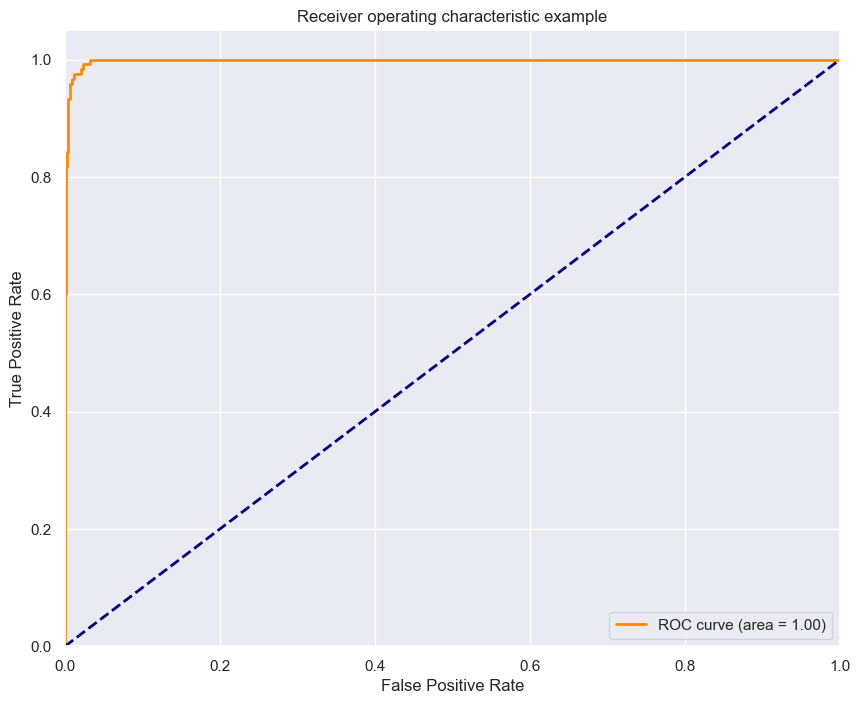

In [39]:
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Learn to predict each class against the other
from sklearn import svm
X = digits.data
y = digits.target

# Binarize the output
y = label_binarize(y, classes=range(0,10))
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7,
                                                    random_state=0)

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

fit_model = classifier.fit(X_train, y_train)
y_score = fit_model.decision_function(X_test)
y_pred_svm = fit_model.predict(X_test)


print (classification_report(y_pred_svm, y_test) )

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       122
           1       0.53      0.96      0.68        69
           2       0.72      0.99      0.84        88
           3       0.61      1.00      0.76        79
           4       0.86      1.00      0.92       103
           5       0.54      1.00      0.70        76
           6       0.88      1.00      0.94       112
           7       0.85      0.97      0.91       102
           8       0.05      1.00      0.09         6
           9       0.42      1.00      0.59        52

   micro avg       0.64      0.99      0.78       809
   macro avg       0.64      0.99      0.74       809
weighted avg       0.74      0.99      0.84       809
 samples avg       0.64      0.64      0.64       809



/Users/tutu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

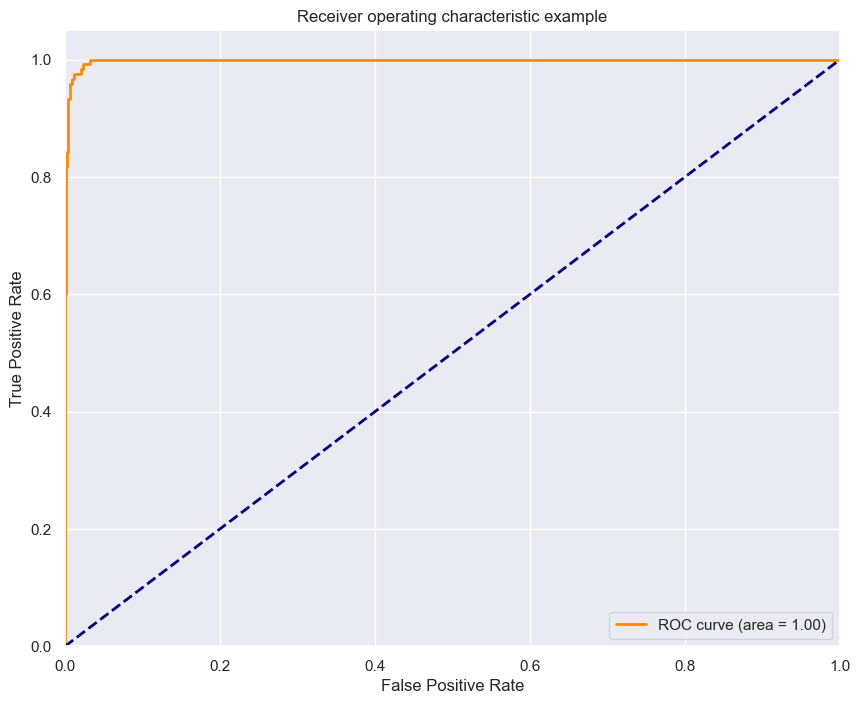

In [42]:
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/var/folders/12/y3f8dw5d3dsc_5ynrf2qky680000gn/T/ipykernel_43652/4094854982.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


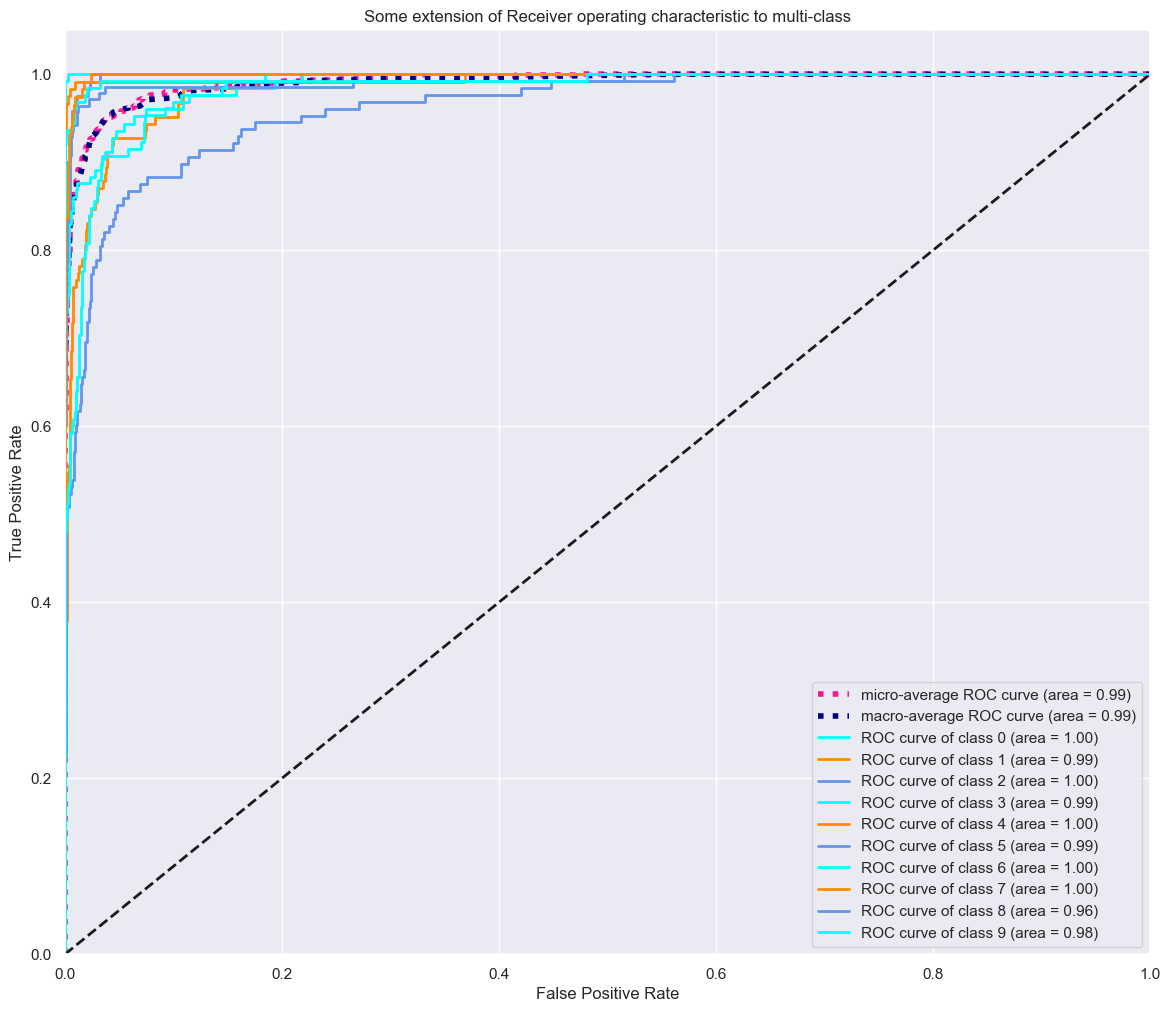

In [43]:
from itertools import cycle
from scipy import interp

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(14, 12))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

<small><i>Reference [GitHub](https://github.com/jakevdp/sklearn_pycon2015/).</i></small>